In [1]:
import seaborn as sns
import os
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision
from sklearn.metrics import roc_curve,auc, precision_score,precision_recall_curve,recall_score,precision_recall_fscore_support,confusion_matrix
import numpy as np
from prettytable import PrettyTable
print(torch.cuda.is_available())
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
print(torch.cuda.get_device_properties(0).total_memory)
print(torch.cuda.memory_allocated())
gpu_id = 2

True
11721506816
0


In [2]:
my_path = '../../dataset/sharma_59_nih_dataset/Image_dataset/'
path_0 = my_path+'0_0/'
path_1 = my_path + '1_1/'
print(len(os.listdir(path_0)))
print(len(os.listdir(path_1)))


# torchvision.transforms.Normalize(mean=torch.rand(3),std = torch.rand(3))
transformations = torchvision.transforms.Compose([torchvision.transforms.Resize((256,256)),
                                                  torchvision.transforms.CenterCrop(224),
                                                  torchvision.transforms.ToTensor()])

images = torchvision.datasets.ImageFolder(root=my_path,transform=transformations)
train_data,validate_data,test_data = torch.utils.data.dataset.random_split(images,[8020,2286,1146])
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=64,shuffle=True)
validate_loader = torch.utils.data.DataLoader(dataset = validate_data,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=64,shuffle=True)


print(images.class_to_idx)

5727
5725
{'0_0': 0, '1_1': 1}


In [3]:
squeeze_1_0 = torchvision.models.squeezenet1_0(pretrained=True)
squeeze_1_0.classifier[1] = nn.Conv2d(512,2,kernel_size=1,stride=1,padding=0)

In [4]:
from pyt_model_class import Model_class

In [5]:
checkpoint = torch.load('saved_models/squeeze_1_0_best_model.pth')

In [6]:
checkpoint.keys()

dict_keys(['best_model', 'best_optimizer', 'message'])

In [10]:
squeeze_1_0.load_state_dict(checkpoint['best_model'])

<All keys matched successfully>

In [11]:
model = Model_class(squeeze_1_0,2)


In [13]:

lab_test,pre_test,predict_test,acc_test=model.evaluate(test_loader,name='test')
print(acc_test)


correct are 809/1146
tensor(0.7059)


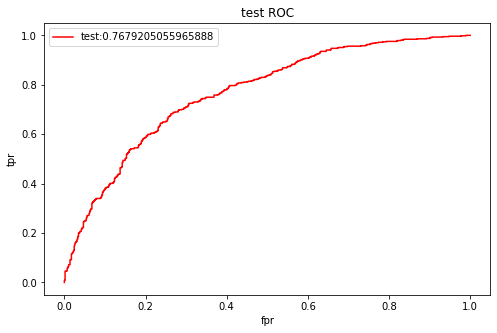

In [14]:
model.plot_roc(name='test',color='red')

In [7]:
checkpoint2 = torch.load('saved_models/squeeze_1_0_test_69.5_auc_76.pth')

In [8]:
checkpoint2.keys()

dict_keys(['model', 'message'])

In [17]:
squeeze_1_0.load_state_dict(checkpoint2['model'])

<All keys matched successfully>

In [18]:
model1 = Model_class(squeeze_1_0,2)

correct are 814/1146
tensor(0.7103)


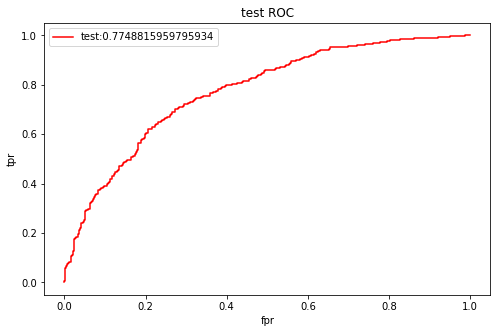

In [19]:

lab_test,pre_test,predict_test,acc_test=model1.evaluate(test_loader,name='test')
print(acc_test)
model1.plot_roc(name='test',color='red')